# Chapter 4  Exercises - Applied

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 10. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [2]:
data = pd.read_csv(r'./data/Weekly.csv')
print(data.shape)
# data.head()
print("-----------------")
print(data.head())

(1089, 9)
-----------------
   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

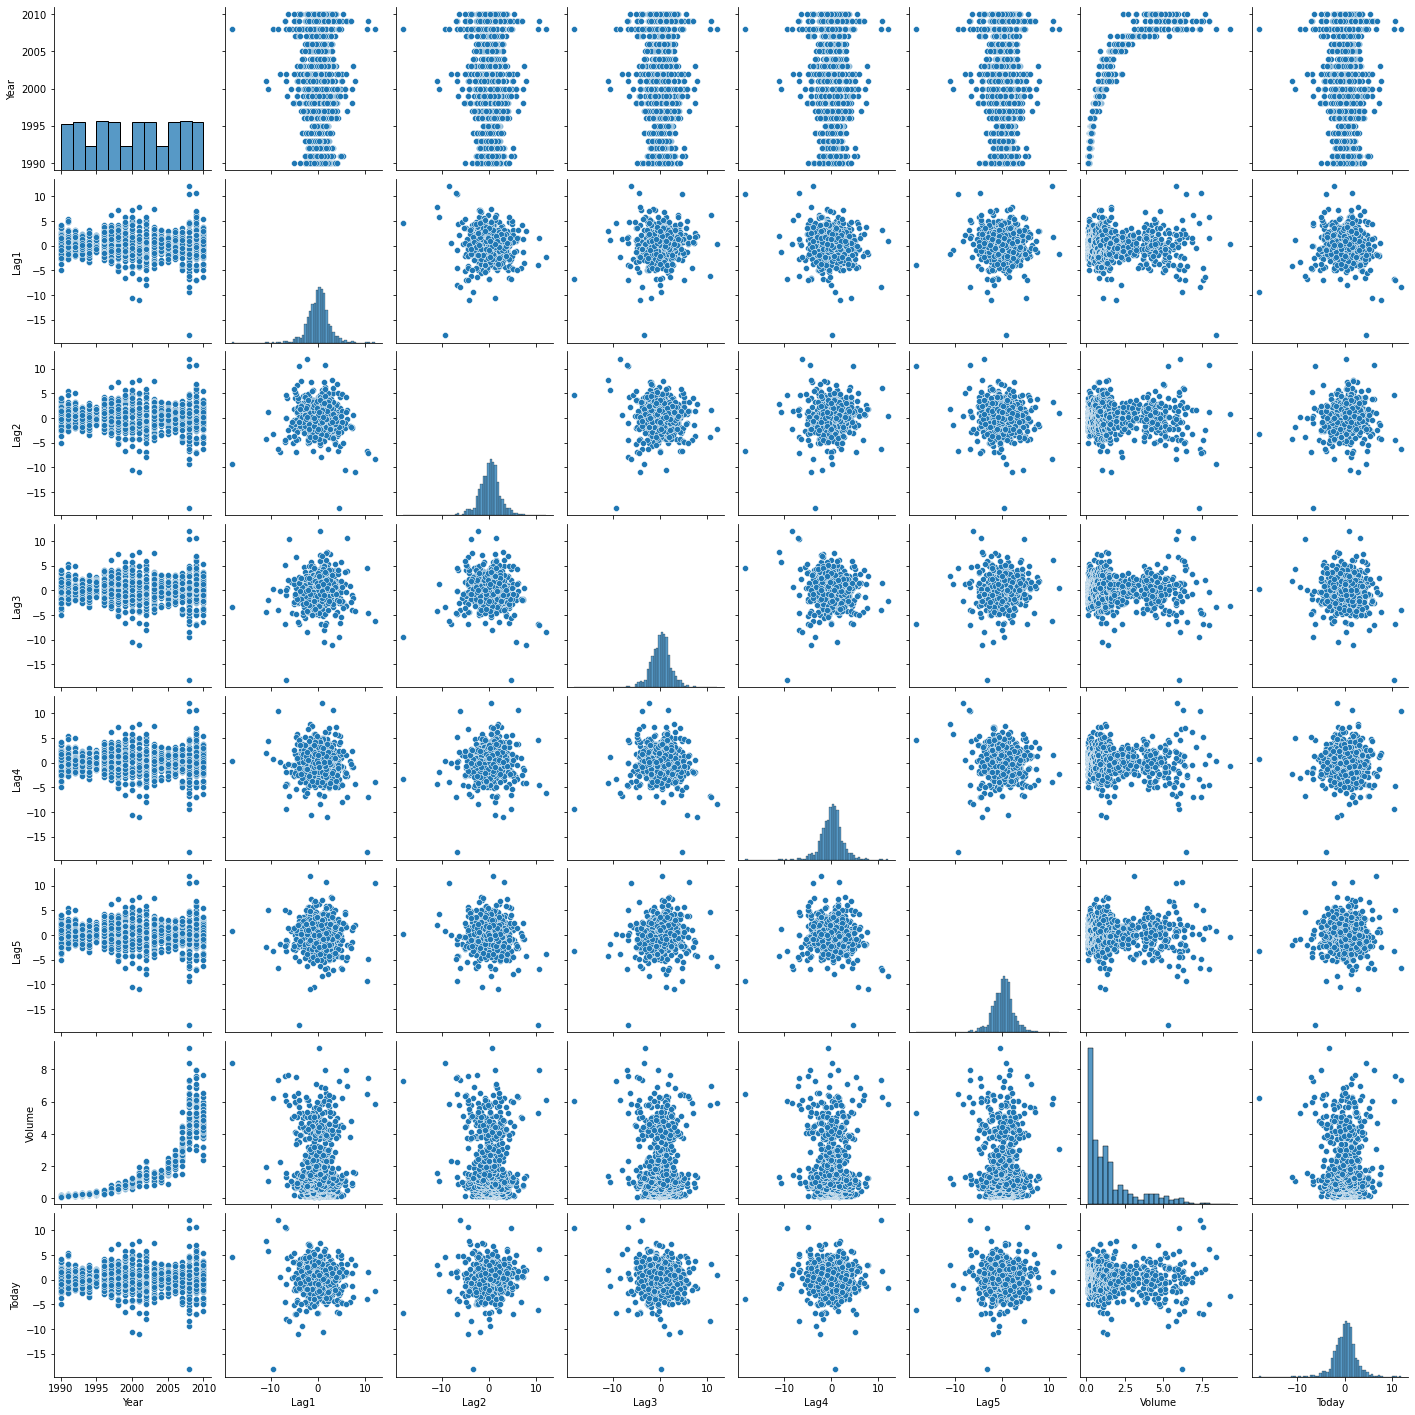

In [3]:
sns.pairplot(data)

<AxesSubplot:>

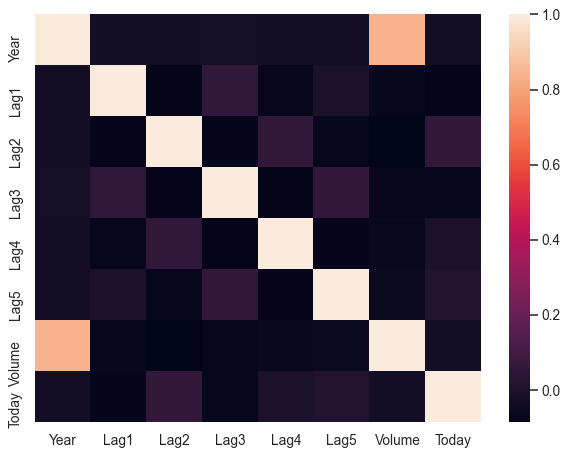

In [4]:
#correlation
corr = data.corr()
sns.set(rc={'figure.figsize':(8,6), "figure.dpi":90})
sns.heatmap(corr)

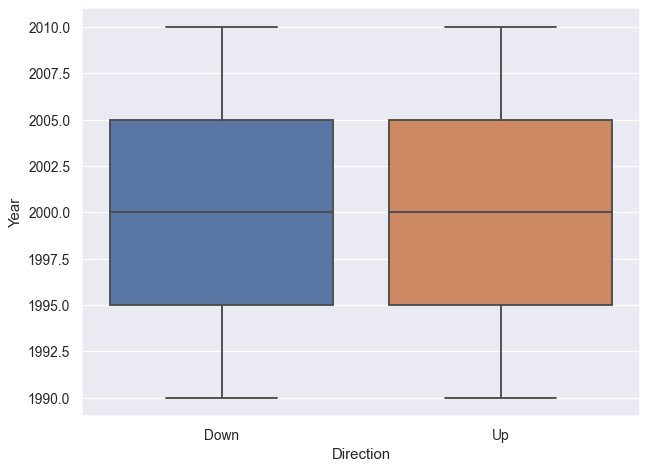

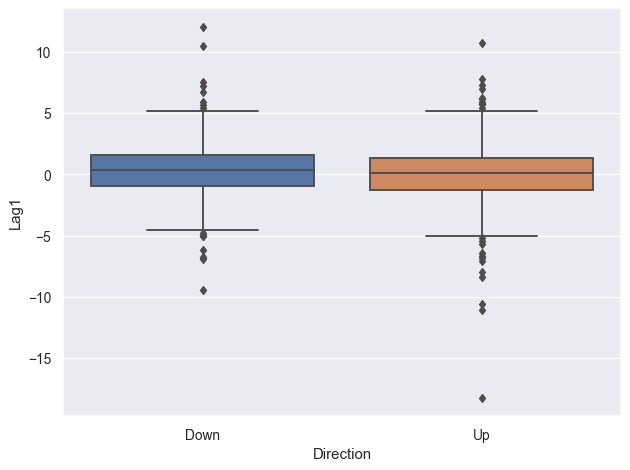

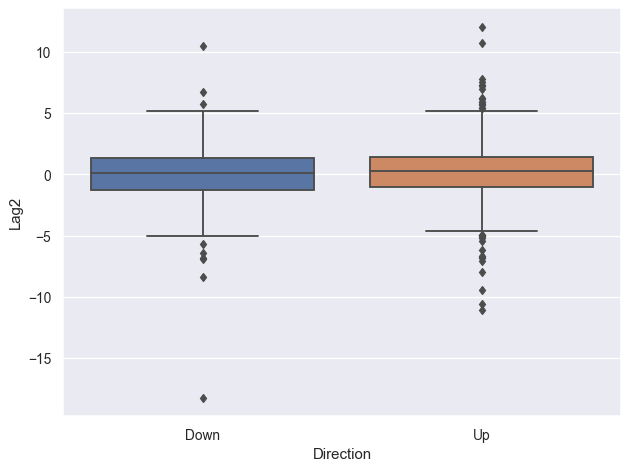

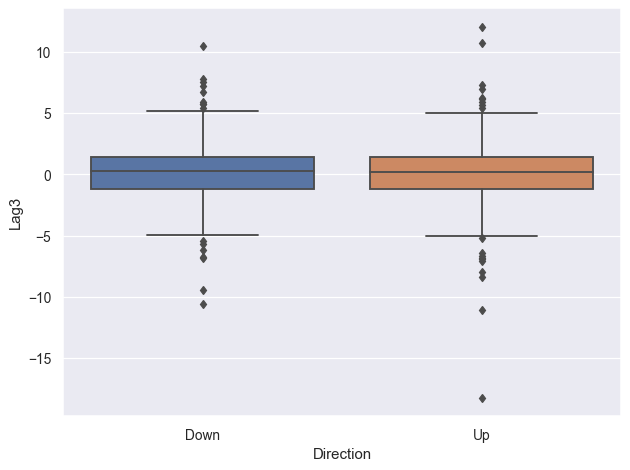

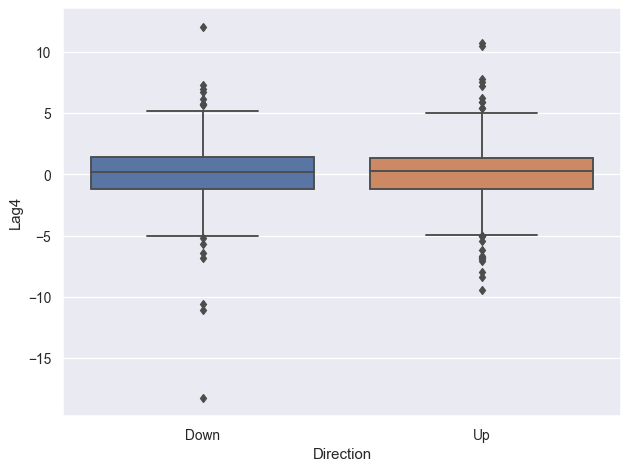

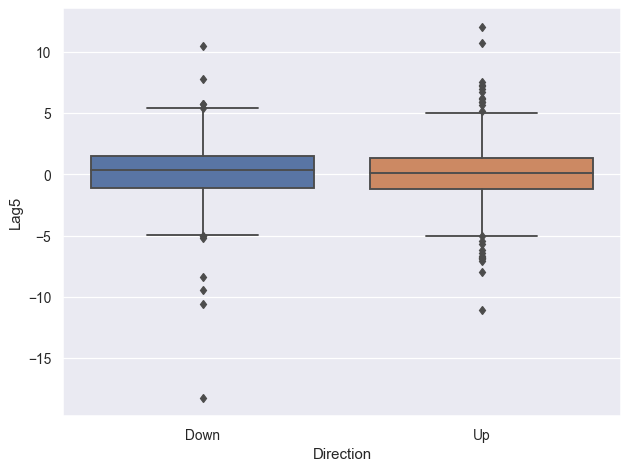

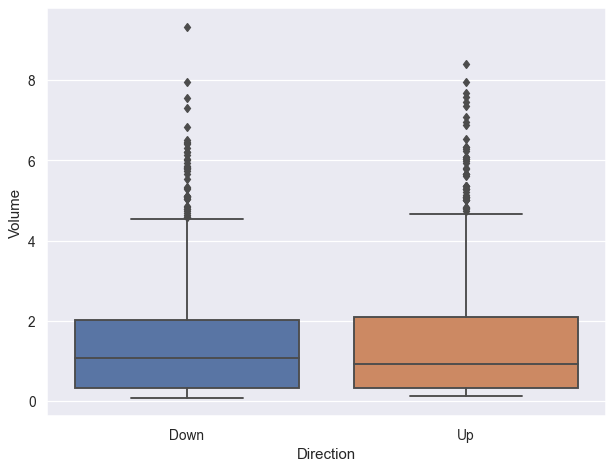

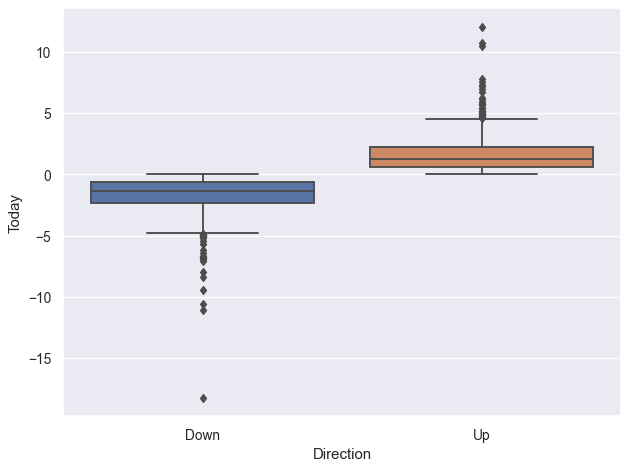

In [5]:
for col in data.columns:
  if col != 'Direction':
    sns.boxplot(y = col,x = 'Direction',data = data)
    plt.show()

### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [6]:
data['Direction'] = data['Direction'].map({'Down':0,'Up':1})

In [7]:
X = data.iloc[:,1:-2]
X = sm.add_constant(X)
y = data['Direction']
results = sm.Logit(y,X).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                0.006580
Time:                        23:55:35   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

#### Observing the p values of the predictors, we can conclude that all the predictors except Lag2, are having a significant p value.

### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [8]:
def analyze_confusion_matrix_and_acc(true,pred):
  cm = confusion_matrix(true,pred)
  temp = pd.DataFrame(cm,['Down','Up'],['Down','Up'])
  print(temp)
  print('')
  print('Total true Down values ',temp.iloc[0,:].sum())
  print('Total true Up values ',temp.iloc[1,:].sum())
  print('Total predicted Down values ',temp.iloc[:,0].sum())
  print('Total predicted Up values ',temp.iloc[:,1].sum())
  print('')
  print('% of Up values in data ',temp.iloc[1,:].sum() / (temp.iloc[0,:].sum() + temp.iloc[1,:].sum()))
  print('% of Up values in prediction ',temp.iloc[:,1].sum() / (temp.iloc[:,1].sum() + temp.iloc[:,0].sum() ))
  print()
  print('The Accuracy is ',accuracy_score(true,pred))

In [9]:
pred = results.predict(X)
pred_classes = np.where(pred>0.5,1,0)

analyze_confusion_matrix_and_acc(data['Direction'],pred_classes)

      Down   Up
Down    54  430
Up      48  557

Total true Down values  484
Total true Up values  605
Total predicted Down values  102
Total predicted Up values  987

% of Up values in data  0.5555555555555556
% of Up values in prediction  0.90633608815427

The Accuracy is  0.5610651974288338


#### in the above matrix, the rows represent the true values and the columns are representing the predicted values
#### We can see that 55% of the total observations are 'Up', while our model predicts 90% of data as 'Up' 

### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010)

In [10]:
train = data[data['Year'] <= 2008]
test = data[data['Year'] > 2008]

print('Shape of train is',train.shape)
print('Shape of test is ',test.shape)

X_train = train['Lag2']
y_train = train['Direction']

X_test = test['Lag2']
y_test = test['Direction']

Shape of train is (985, 9)
Shape of test is  (104, 9)


In [11]:
lr = LogisticRegression()
lr.fit(X_train.to_frame(),y_train)

LogisticRegression()

In [12]:
pred = lr.predict(X_test.to_frame())

analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down     9  34
Up       5  56

Total true Down values  43
Total true Up values  61
Total predicted Down values  14
Total predicted Up values  90

% of Up values in data  0.5865384615384616
% of Up values in prediction  0.8653846153846154

The Accuracy is  0.625


### (e) Repeat (d) using LDA.

In [13]:
lda = LDA()
lda.fit(X_train.to_frame(),y_train)

LinearDiscriminantAnalysis()

In [14]:
pred = lda.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down     9  34
Up       5  56

Total true Down values  43
Total true Up values  61
Total predicted Down values  14
Total predicted Up values  90

% of Up values in data  0.5865384615384616
% of Up values in prediction  0.8653846153846154

The Accuracy is  0.625


### (f) Repeat (d) using QDA.

In [15]:
qda =QDA()
qda.fit(X_train.to_frame(),y_train)

QuadraticDiscriminantAnalysis()

In [16]:
pred = qda.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down     0  43
Up       0  61

Total true Down values  43
Total true Up values  61
Total predicted Down values  0
Total predicted Up values  104

% of Up values in data  0.5865384615384616
% of Up values in prediction  1.0

The Accuracy is  0.5865384615384616


#### QDA us predicting every observation to be Up

### (g) Repeat (d) using KNN with K = 1

In [17]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train.to_frame(),y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn_1.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down    21  22
Up      30  31

Total true Down values  43
Total true Up values  61
Total predicted Down values  51
Total predicted Up values  53

% of Up values in data  0.5865384615384616
% of Up values in prediction  0.5096153846153846

The Accuracy is  0.5


### (h) Which of these methods appears to provide the best results on this data?

#### Both the linear models logistic regerssiona and lda are giving the best accuracy of 62.5%.

### (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [19]:
#lets add an interaction term of lag1*lag3
train = data[data['Year'] <= 2008]
test = data[data['Year'] > 2008]

train['interaction_term'] = train['Lag1']*train['Lag3']
test['interaction_term'] = test['Lag1']*train['Lag3']

X_train = train[['Lag2','interaction_term']]
y_train = train['Direction']

X_test = test[['Lag2','interaction_term']]
y_test = test['Direction']

<ipython-input-19-2a4dcb47fe37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['interaction_term'] = train['Lag1']*train['Lag3']
<ipython-input-19-2a4dcb47fe37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['interaction_term'] = test['Lag1']*train['Lag3']


In [20]:
print(X_train.head())

    Lag2  interaction_term
0  1.572         -3.211776
1  0.816         -0.424440
2 -0.270         -2.102016
3 -2.576         -0.948780
4  3.514         -1.834112


In [21]:
results = sm.Logit(y_train,sm.add_constant(X_train)).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.684687
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            2
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                0.004338
Time:                        23:55:35   Log-Likelihood:                -674.42
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.05296
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1994      0.064      3.095      0.002       0.073       0.326
Lag2       

#### the p value of interaction term is 0.2, which is quite sinifican, hence we will drop it

In [22]:
X_train.drop('interaction_term',axis = 1,inplace = True)
X_test.drop('interaction_term',axis = 1,inplace = True)

d:\miniconda\install\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
neighbor_list = [i for i in range(1,10)]
neighbor_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [24]:
def run_knn(n_neighbors):
  accuracy_list = []
  for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train,y_train)

    pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test,pred))
  return accuracy_list

In [25]:
run_knn(neighbor_list)

[0.5,
 0.47115384615384615,
 0.5384615384615384,
 0.5769230769230769,
 0.5288461538461539,
 0.5288461538461539,
 0.5480769230769231,
 0.5384615384615384,
 0.5480769230769231]

#### we are grtting the max value for k=4, but that is still less than the accuracy we obtained by linear model

## 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [26]:
data = pd.read_csv(r'./data/Auto.csv')
print(data.shape)
data.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [27]:
data['mpg01'] = np.where(data['mpg'] > data['mpg'].median(),1,0)

### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

<AxesSubplot:>

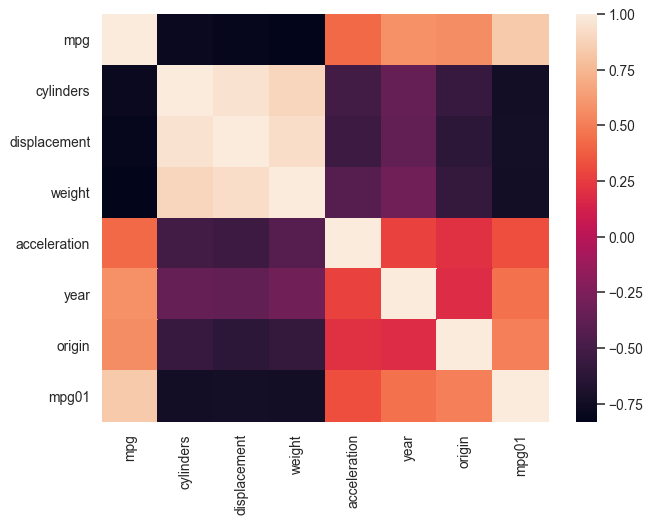

In [28]:
corr = data.corr()
sns.heatmap(corr)

#### there is a strong correlation of mpg01 with ['cylinders','displacement','weight']

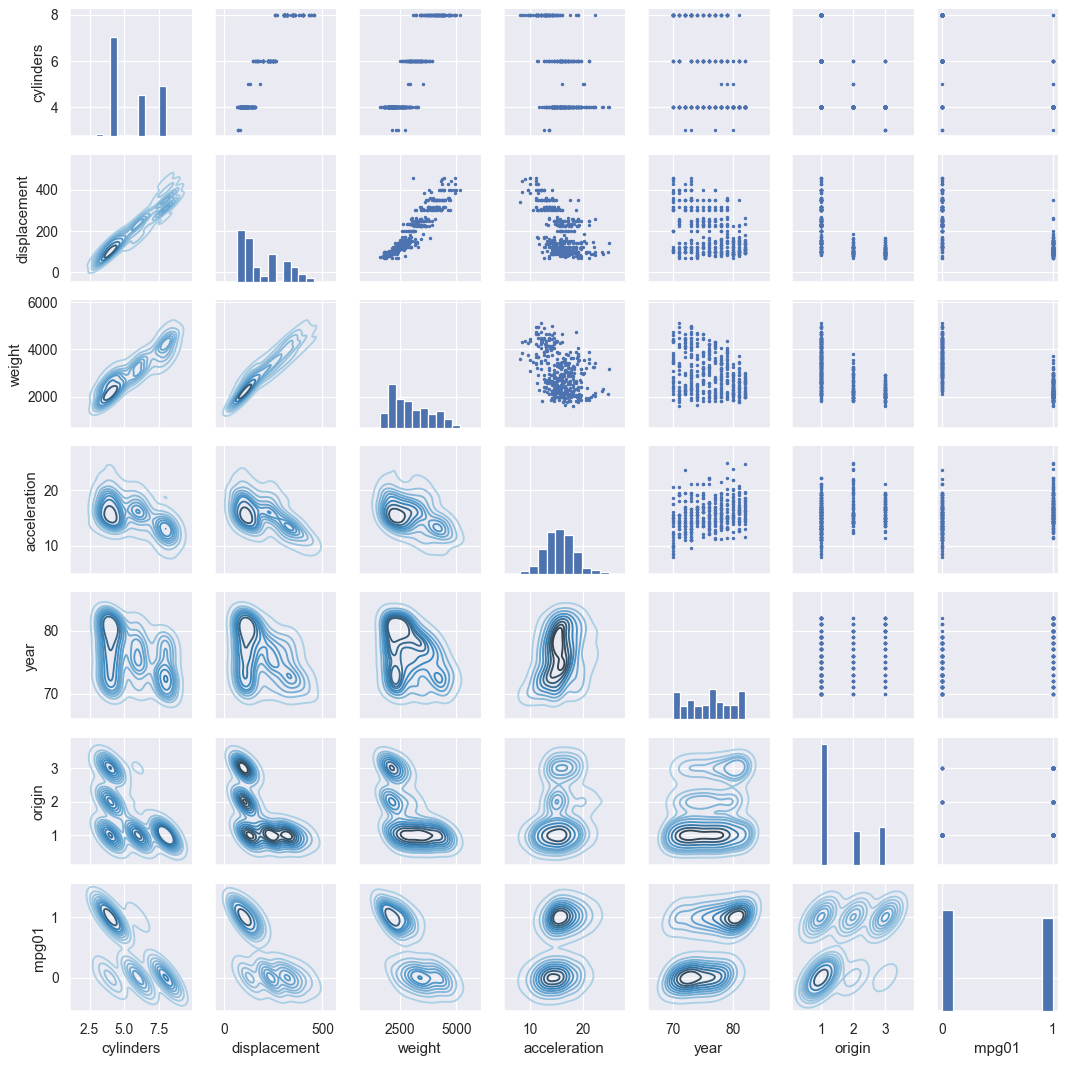

In [29]:
g = sns.PairGrid(data.drop('mpg',axis = 1), height=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)

### (c) Split the data into a training set and a test set.

In [30]:
# we will only use cylinder, displacement and weight
X_train,X_test,y_train,y_test = train_test_split(data[['cylinders','displacement','weight']],data['mpg01'],test_size = 0.2)
print('Shape of training ',X_train.shape)
print('Shape of testing ',X_test.shape)

Shape of training  (317, 3)
Shape of testing  (80, 3)


### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [31]:
lda = LDA()
lda.fit(X_train,y_train)
pred = lda.predict(X_test)

analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down    32   8
Up       3  37

Total true Down values  40
Total true Up values  40
Total predicted Down values  35
Total predicted Up values  45

% of Up values in data  0.5
% of Up values in prediction  0.5625

The Accuracy is  0.8625


### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [32]:
qda = QDA()
qda.fit(X_train,y_train)
pred = qda.predict(X_test)
analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down    33   7
Up       4  36

Total true Down values  40
Total true Up values  40
Total predicted Down values  37
Total predicted Up values  43

% of Up values in data  0.5
% of Up values in prediction  0.5375

The Accuracy is  0.8625


### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
analyze_confusion_matrix_and_acc(y_test,pred)

      Down  Up
Down    31   9
Up       4  36

Total true Down values  40
Total true Up values  40
Total predicted Down values  35
Total predicted Up values  45

% of Up values in data  0.5
% of Up values in prediction  0.5625

The Accuracy is  0.8375


### (g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [34]:
neighbor_list = [i for i in range(1,10)]
neighbor_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
acc = run_knn(neighbor_list) 

In [36]:
pd.DataFrame({'N_neighbors':neighbor_list,'Accuracy':acc})

,N_neighbors,Accuracy
0,1,0.7375
1,2,0.7875
2,3,0.7750
3,4,0.8000
4,5,0.8500
5,6,0.8500
6,7,0.8625
7,8,0.8500
8,9,0.8375


#### best acc is obtaines for 5 nieghbors, which is 88.75 

## 12. This problem involves writing functions

### (a) Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 23 and print out the results

In [37]:
def Power():
  print(2**3)
Power()    

8


### (b) Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x^a.

In [38]:
def Power2(x,a):
  print(x**a)

Power2(3,8)        

6561


### (c) Using the Power2() function that you just wrote, compute 10^3, 8^17, and 131^3.

In [39]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

1000
2251799813685248
2248091


### (d) Now create a new function, Power3(), that actually returns the result x^a as an R object, rather than simply printing it to the screen. 

In [40]:
def Power3(x,a):
  return x**a

### (e) Now using the Power3() function, create a plot of f(x) = x2. The x-axis should display a range of integers from 1 to 10, and the y-axis should display x2. Label the axes appropriately, and use an appropriate title for the figure.

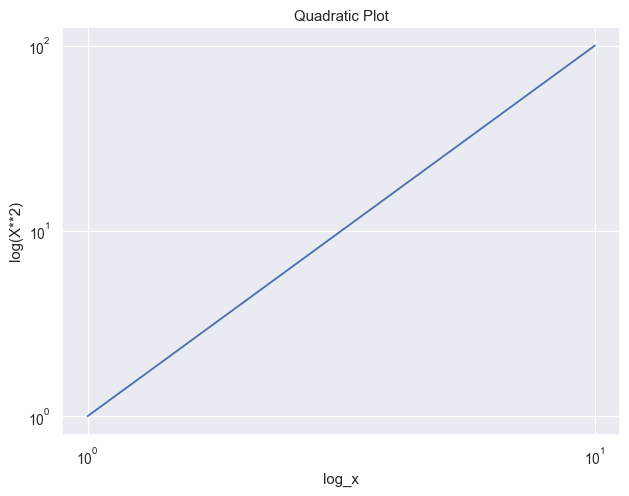

In [41]:
def plot(log = ''):
  X = np.arange(1,11)
  y = Power3(X,2)

  fig,ax = plt.subplots()

  if log == 'x':
      ax.set_xlabel('log_x')
      ax.set_xscale('log')
      ax.set_ylabel('X**2')

  elif log == 'y':
      ax.set_xlabel('X')
      ax.set_yscale('log')
      ax.set_ylabel('log(X**2)')

  elif log == 'xy':
      ax.set_xlabel('log_x')
      ax.set_xscale('log')
      ax.set_yscale('log')
      ax.set_ylabel('log(X**2)')

  else:    
      ax.set_xlabel('X')
      ax.set_ylabel('X**2')

  ax.plot(X,y)
  plt.title('Quadratic Plot')

plot('xy')

### (f) Create a function, PlotPower(), that allows you to create a plot of x against x^a for a fixed a and for a range of values of x.

In [42]:
def PlotPower(x,a):
  y = Power3(x,a)
  plt.plot(x,y)
  plt.xlabel('X')
  plt.ylabel('X^' + str(a))
  plt.title('Power Plot')

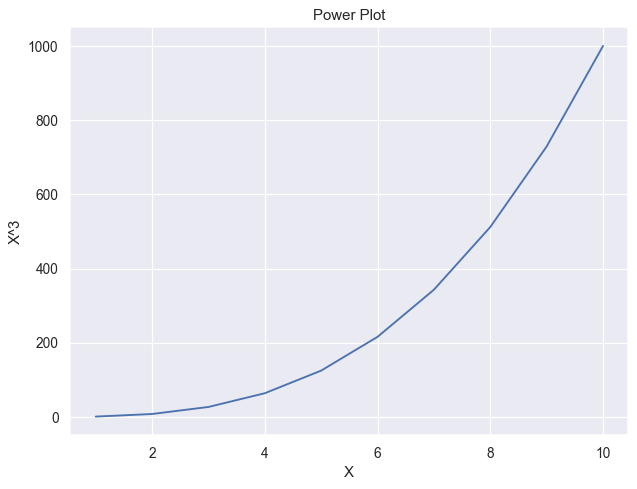

In [43]:
PlotPower(np.arange(1,11),3)

## 13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

In [44]:
from  sklearn.datasets import load_boston

boston = load_boston()

data = pd.DataFrame(data = boston.data,columns = boston.feature_names)
print(data.shape)
data.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
#adding a new col CRIM01, which is 0, if CRIM is less than median,and else 1
data['CRIM01'] = np.where(data['CRIM'] > data['CRIM'].median(),1,0)
print(data['CRIM01'].value_counts() / len(data))
data.drop('CRIM',axis = 1,inplace = True)
# Half of the observations are labelled 1, half is 0. The classes are balanced.

0    0.5
1    0.5
Name: CRIM01, dtype: float64


In [46]:
# Finding corelation among predictors and response
corr = data.corr()
corr['CRIM01'].sort_values(ascending = False)[1:]

NOX        0.723235
RAD        0.619786
AGE        0.613940
TAX        0.608741
INDUS      0.603260
LSTAT      0.453263
PTRATIO    0.253568
CHAS       0.070097
RM        -0.156372
B         -0.351211
ZN        -0.436151
DIS       -0.616342
Name: CRIM01, dtype: float64

In [47]:
all_features = [col for col in data.columns if col != 'CRIM01']
print('Total features are ',len(all_features))
selected_features  = [col for col in all_features if not col in ['INDUS','LSTAT','PTRATIO','CHAS','RM','B']]
print('Selected features are ',len(selected_features))

Total features are  12
Selected features are  6


In [48]:
target = data['CRIM01']
data_orig = data.drop('CRIM01',axis = 1)
data_selected = data.drop(selected_features,axis = 1)
data_selected.drop('CRIM01',axis = 1,inplace = True)

In [49]:
data_orig.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
data_selected.head()

,INDUS,CHAS,RM,PTRATIO,B,LSTAT
0,2.31,0.0,6.575,15.3,396.90,4.98
1,7.07,0.0,6.421,17.8,396.90,9.14
2,7.07,0.0,7.185,17.8,392.83,4.03
3,2.18,0.0,6.998,18.7,394.63,2.94
4,2.18,0.0,7.147,18.7,396.90,5.33


In [51]:
X_train_orig,X_test_orig,y_train_orig,y_test_orig = train_test_split(data_orig,target,test_size = 0.2,random_state = 0)
X_train_sel,X_test_sel,y_train_sel,y_test_sel = train_test_split(data_selected,target,test_size = 0.2,random_state = 0)


In [52]:
# modying the func that we wrote earlier
def analyze_confusion_matrix_and_acc(true,pred):
  cm = confusion_matrix(true,pred)
  temp = pd.DataFrame(cm,['0','1'],['0','1'])
  print(temp)
  print('')
  print('Total true 0 values ',temp.iloc[0,:].sum())
  print('Total true 1 values ',temp.iloc[1,:].sum())
  print('Total predicted 0 values ',temp.iloc[:,0].sum())
  print('Total predicted 1 values ',temp.iloc[:,1].sum())
  print('')
  print('% of 1 values in data ',temp.iloc[1,:].sum() / (temp.iloc[0,:].sum() + temp.iloc[1,:].sum()))
  print('% of 1 values in prediction ',temp.iloc[:,1].sum() / (temp.iloc[:,1].sum() + temp.iloc[:,0].sum() ))
  print()
  print('The Accuracy is ',accuracy_score(true,pred))

### Logistic Regression

In [53]:
# selected data
lr = LogisticRegression()
lr.fit(X_train_sel,y_train_sel)
pred = lr.predict(X_test_sel)
analyze_confusion_matrix_and_acc(y_test_sel,pred)

    0   1
0  45   6
1  10  41

Total true 0 values  51
Total true 1 values  51
Total predicted 0 values  55
Total predicted 1 values  47

% of 1 values in data  0.5
% of 1 values in prediction  0.46078431372549017

The Accuracy is  0.8431372549019608


#### Model with selected features is performing better than model with all the features

### LDA

In [55]:
# selected data
lda = LDA()
lda.fit(X_train_sel,y_train_sel)
pred = lda.predict(X_test_sel)
analyze_confusion_matrix_and_acc(y_test_sel,pred)

    0   1
0  44   7
1  12  39

Total true 0 values  51
Total true 1 values  51
Total predicted 0 values  56
Total predicted 1 values  46

% of 1 values in data  0.5
% of 1 values in prediction  0.45098039215686275

The Accuracy is  0.8137254901960784


In [56]:
# orig data
lda = LDA()
lda.fit(X_train_orig,y_train_orig)
pred = lda.predict(X_test_orig)
analyze_confusion_matrix_and_acc(y_test_orig,pred)

    0   1
0  48   3
1  10  41

Total true 0 values  51
Total true 1 values  51
Total predicted 0 values  58
Total predicted 1 values  44

% of 1 values in data  0.5
% of 1 values in prediction  0.43137254901960786

The Accuracy is  0.8725490196078431


### QDA

In [57]:
# selected data
qda = QDA()
qda.fit(X_train_sel,y_train_sel)
pred = qda.predict(X_test_sel)
analyze_confusion_matrix_and_acc(y_test_sel,pred)

    0   1
0  48   3
1  16  35

Total true 0 values  51
Total true 1 values  51
Total predicted 0 values  64
Total predicted 1 values  38

% of 1 values in data  0.5
% of 1 values in prediction  0.37254901960784315

The Accuracy is  0.8137254901960784


In [58]:
# orig data
qda = QDA()
qda.fit(X_train_orig,y_train_orig)
pred = qda.predict(X_test_orig)
analyze_confusion_matrix_and_acc(y_test_orig,pred)

    0   1
0  49   2
1  10  41

Total true 0 values  51
Total true 1 values  51
Total predicted 0 values  59
Total predicted 1 values  43

% of 1 values in data  0.5
% of 1 values in prediction  0.4215686274509804

The Accuracy is  0.8823529411764706


### KNN

In [61]:
def run_knn(X_train,y_train,X_test,y_test,n_neighbors):
  accuracy_list = []
  for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test,pred))
  return accuracy_list   

In [63]:
n_neighbors = np.arange(1,11)

#selected_features
acc = run_knn(X_train_sel,y_train_sel,X_test_sel,y_test_sel,n_neighbors)
pd.Series(acc,index = n_neighbors).sort_values(ascending=False)

1     0.892157
2     0.852941
3     0.852941
4     0.852941
6     0.843137
7     0.843137
5     0.823529
8     0.823529
9     0.823529
10    0.823529
dtype: float64

In [64]:
# orig features
acc = run_knn(X_train_orig,y_train_orig,X_test_orig,y_test_orig,n_neighbors)
pd.Series(acc,index = n_neighbors).sort_values(ascending=False)

4     0.931373
6     0.931373
2     0.921569
5     0.921569
1     0.911765
7     0.911765
8     0.901961
3     0.892157
9     0.892157
10    0.882353
dtype: float64

## Model with all feautres outperformes model with selected feautures.
## Except in logistic regression, model with all feature had better accuract than model with selected fetures.
## best accuracy is for model with all selected features and k = 1, acc = 93.13